# Dimension Reduction and Clustering using ID: kesevguamy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kesevguamy.csv',index_col='day',parse_dates=True)

In [3]:
data

,Unnamed: 0,shieldid,dns_qname,dns_qdomainname,num_clients,num_responses,timefirstseen,timelastseen
day,,,,,,,,
2022-10-10,27814,kesevguamy,0c56aa11-a835-4ac0-9373-7fda5334ea67-pdata-v4....,fastly-insights.com,1,1,2022-10-10 12:18:31.844,2022-10-10 12:18:31.844
2022-10-01,27815,kesevguamy,1.centos.pool.ntp.org,ntp.org,1,8,2022-10-01 01:28:08.761,2022-10-01 01:56:26.570
2022-11-14,27816,kesevguamy,15.taboola.com,taboola.com,2,24,2022-11-14 13:36:39.918,2022-11-14 17:06:32.120
2022-10-04,27817,kesevguamy,191637-ipv4.farm.dprodmgd105.aa-rt.sharepoint.com,sharepoint.com,1,1,2022-10-04 21:13:59.634,2022-10-04 21:13:59.634
2022-12-21,27818,kesevguamy,2.dl.delivery.mp.microsoft.com,microsoft.com,2,4,2022-12-21 15:10:50.085,2022-12-21 15:10:50.116
...,...,...,...,...,...,...,...,...
2022-10-06,47081177,kesevguamy,x2.c.lencr.org.x.051fb7210d3ae04dc70816a04ee70...,opendns.com,2,2,2022-10-06 04:41:32.481,2022-10-06 04:41:32.542
2022-10-08,47081178,kesevguamy,x2.c.lencr.org.x.102f018806327042900a4c20ed7fe...,opendns.com,3,4,2022-10-08 03:11:00.893,2022-10-08 03:11:00.961
2022-10-05,47081179,kesevguamy,x2.c.lencr.org.x.29bacd3707f16047ed09f09028292...,opendns.com,2,2,2022-10-05 20:11:47.111,2022-10-05 20:11:47.132


In [4]:
# data frame grouped by day with the total num_clients, by dns_qdomainname

counts=data.pivot_table(values='num_clients',
                       index=data.index.date,
                       columns='dns_qdomainname',
                       aggfunc=sum,
                       fill_value=0)
counts

dns_qdomainname,00px.net,0basedesign.com,101blockchains.com,10bestmedia.com,1109bravo.com,123-reg.co.uk,123rf.com,126.net,13newsnow.com,14print.com,...,zrci.com,zscaler.com,zscaler.net,zucks.net,zwickroell.com,zwyr157wwiu6eior.com,zygomatic.nl,zykansafe.com,zyrachat.com,zyratalk.com
2022-10-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-10-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-10-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-10-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-10-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#filter out domains with small counts
counts=counts.loc[:,counts.max()>10]
#normalize
counts = counts/counts.max()


## PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA(n_components=2)
PCS=pca.fit_transform(counts.T)

In [8]:
pca.explained_variance_ratio_

array([0.55134748, 0.04205812])

In [9]:
PCDF = pd.DataFrame(data=PCS)
PCDF

,0,1
0,0.626038,-0.077355
1,1.467592,-0.037560
2,2.252319,-0.143603
3,4.743319,0.988326
4,2.774879,0.964039
...,...,...
537,0.305571,-0.310422
538,0.579113,-0.473804
539,-1.059296,0.071529
540,-0.765123,0.096407


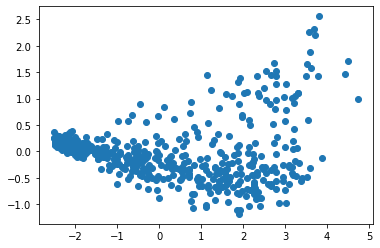

In [10]:
plt.scatter(x=PCDF[0],y=PCDF[1])

In [11]:
# Using PCA seems to produce very little clustering

## T-SNE

In [12]:
from sklearn.manifold import TSNE

In [19]:
# Using TSNE on the data frame with varrying perplexity
tsne1 = TSNE(n_components=2,perplexity=10).fit_transform(counts.T)
tsne2 = TSNE(n_components=2,perplexity=20).fit_transform(counts.T)
tsne3 = TSNE(n_components=2,perplexity=30).fit_transform(counts.T)
tsne4 = TSNE(n_components=2,perplexity=40).fit_transform(counts.T)
tsne5 = TSNE(n_components=2,perplexity=50).fit_transform(counts.T)



C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: Future

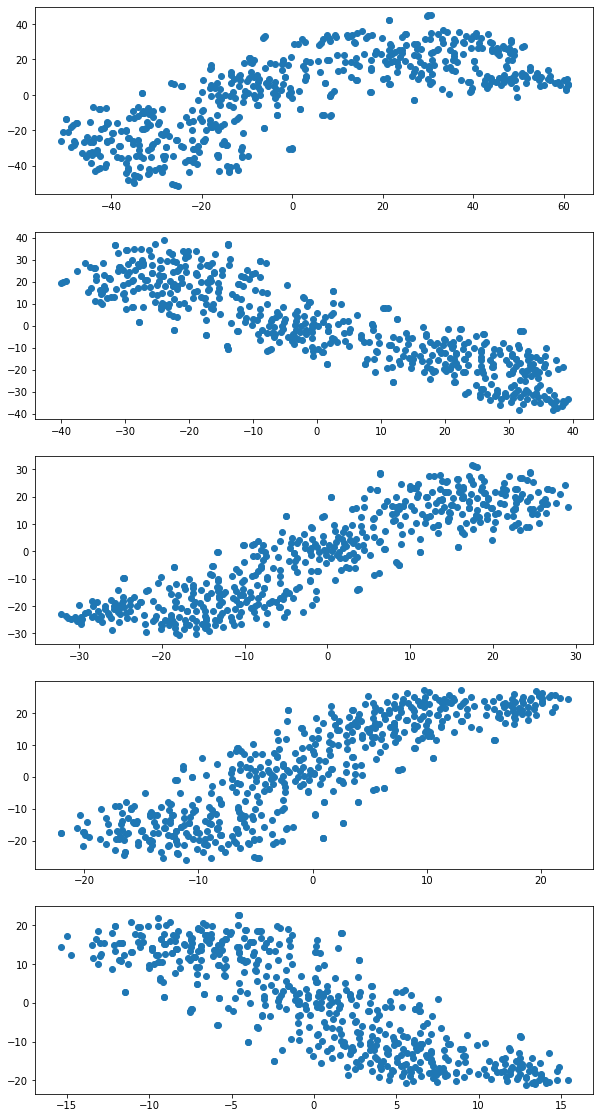

In [20]:
fig,ax=plt.subplots(5,1,figsize=(10,20))
ax[0].scatter(tsne1[:,0],tsne1[:,1])
ax[1].scatter(tsne2[:,0],tsne2[:,1])
ax[2].scatter(tsne3[:,0],tsne3[:,1])
ax[3].scatter(tsne4[:,0],tsne4[:,1])
ax[4].scatter(tsne5[:,0],tsne5[:,1])

In [21]:
# TSNE appears to show some clustering 

## T-SNE Clustering

### Gaussian Mixtures

In [29]:
def plot_gaussian_mixture(model, X):
    from matplotlib.colors import LogNorm    
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong')
    
    
    resolution = 1000
    
    # create a mesh grid
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -model.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    # plot data
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
    # plot centroids
    centroids = model.means_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color='r', zorder=11, alpha=1)

  

In [30]:
from sklearn.mixture import GaussianMixture
gm1=GaussianMixture(n_components=4).fit(tsne1)
gm2=GaussianMixture(n_components=4).fit(tsne2)
gm3=GaussianMixture(n_components=4).fit(tsne3)
gm4=GaussianMixture(n_components=4).fit(tsne4)
gm5=GaussianMixture(n_components=4).fit(tsne5)

C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

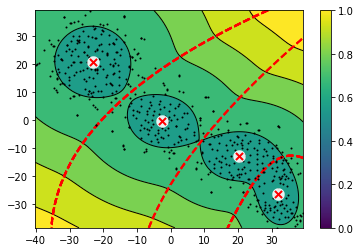

In [31]:
plot_gaussian_mixture(gm2,tsne2)
plt.colorbar()

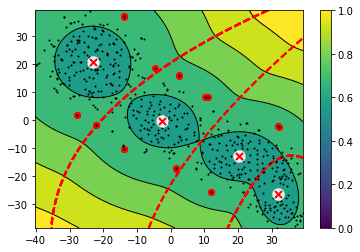

In [33]:
densities = gm2.score_samples(tsne2)
density_threshold = np.percentile(densities,4)
anomalies = tsne2[densities<density_threshold]

plot_gaussian_mixture(gm2, tsne2)
plt.colorbar()
plt.scatter(anomalies[:,0],anomalies[:,1],color='red')

Using gaussian mixtures produced some possible anamolies however still unsure if this is a plausible clustering technique given that i am unsure if he data comes from a mixture of a finite number of gaussian distributions

## UMAP

In [35]:
import umap

In [36]:
#
reducer1 = umap.UMAP(n_neighbors=10,min_dist=0.001).fit_transform(counts.T)
reducer2 = umap.UMAP(n_neighbors=20,min_dist=0.001).fit_transform(counts.T)
reducer3 = umap.UMAP(n_neighbors=30,min_dist=0.001).fit_transform(counts.T)
reducer4 = umap.UMAP(n_neighbors=40,min_dist=0.001).fit_transform(counts.T)
reducer5 = umap.UMAP(n_neighbors=50,min_dist=0.001).fit_transform(counts.T)

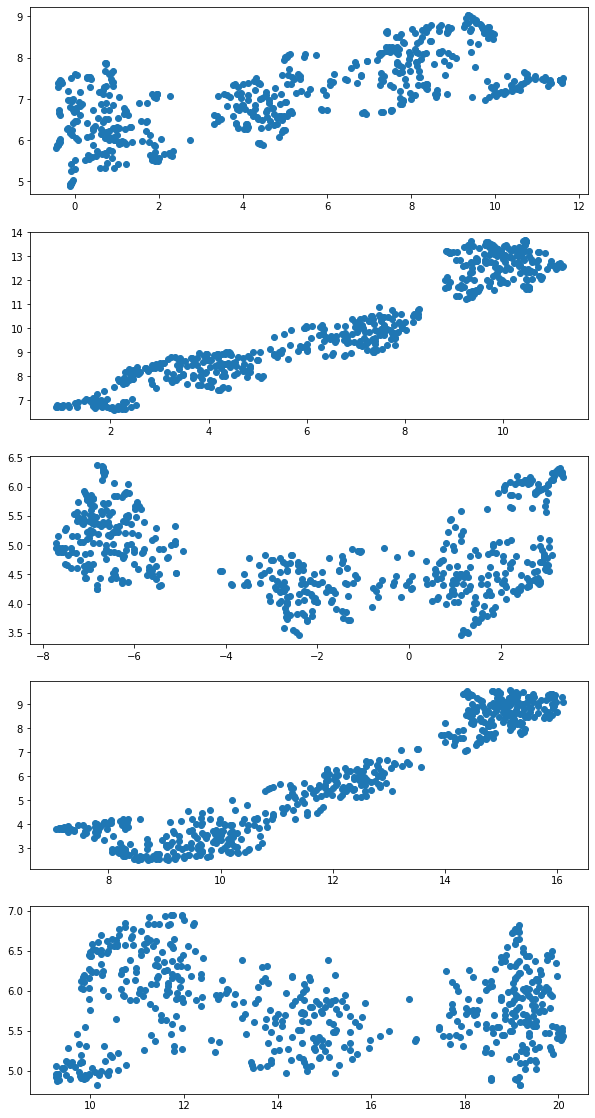

In [37]:
fig, ax = plt.subplots(5,1,figsize=(10,20))

ax[0].scatter(reducer1[:,0],reducer1[:,1])
ax[1].scatter(reducer2[:,0],reducer2[:,1])
ax[2].scatter(reducer3[:,0],reducer3[:,1])
ax[3].scatter(reducer4[:,0],reducer4[:,1])
ax[4].scatter(reducer5[:,0],reducer5[:,1])

## UMAP Clustering

### Agglomerative

In [38]:
from sklearn.cluster import AgglomerativeClustering

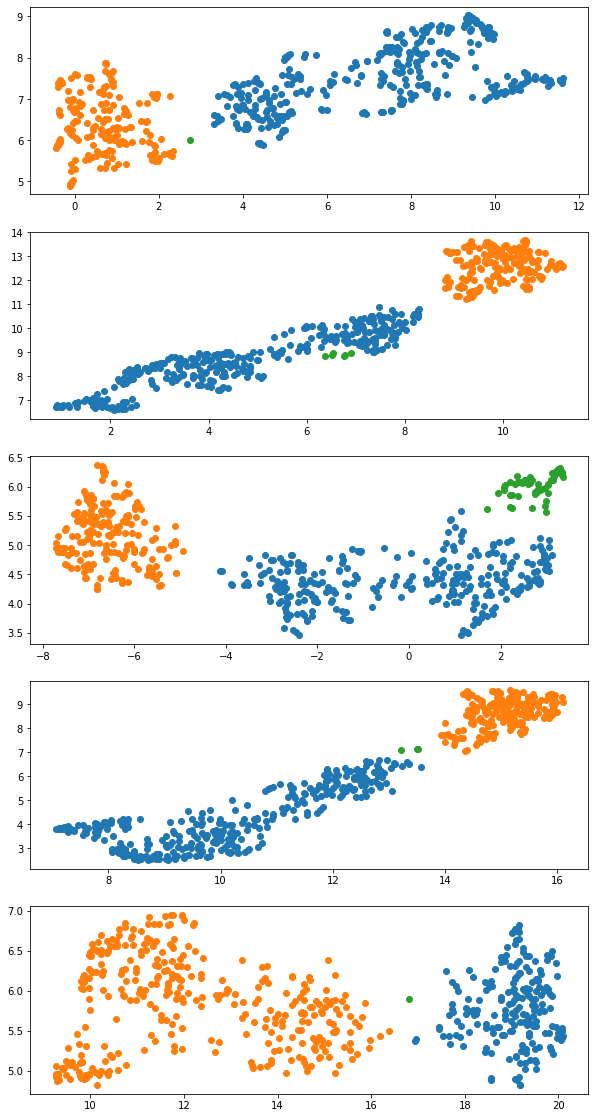

In [39]:
k = 3
aggclt1 = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt1.fit(reducer1)

aggclt2 = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt2.fit(reducer2)

aggclt3 = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt3.fit(reducer3)

aggclt4 = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt4.fit(reducer4)

aggclt5 = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt5.fit(reducer5)

# cluster labels
labels1 = aggclt1.labels_
labels2 = aggclt2.labels_
labels3 = aggclt3.labels_
labels4 = aggclt4.labels_
labels5 = aggclt5.labels_

# plot clusters
fig, ax = plt.subplots(5,1,figsize=(10,20))
for i in range(k):
    ax[0].scatter(reducer1[labels1==i,0],reducer1[labels1==i,1])
    ax[1].scatter(reducer2[labels2==i,0],reducer2[labels2==i,1])
    ax[2].scatter(reducer3[labels3==i,0],reducer3[labels3==i,1])
    ax[3].scatter(reducer4[labels4==i,0],reducer4[labels4==i,1])
    ax[4].scatter(reducer5[labels5==i,0],reducer5[labels5==i,1])
    

### Gaussian Mixtures

In [90]:
from sklearn.mixture import GaussianMixture
gm1=GaussianMixture(n_components=5).fit(reducer1)
gm2=GaussianMixture(n_components=5).fit(reducer2)
gm3=GaussianMixture(n_components=5).fit(reducer3)
gm4=GaussianMixture(n_components=5).fit(reducer4)
gm5=GaussianMixture(n_components=5).fit(reducer5)

C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\nakae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [91]:
def plot_gaussian_mixture(model, X):
    from matplotlib.colors import LogNorm    
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong')
    
    
    resolution = 1000
    
    # create a mesh grid
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -model.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    # plot data
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
    # plot centroids
    centroids = model.means_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color='r', zorder=11, alpha=1)

    plt.xlabel(feature_names[0], fontsize=15)
    plt.ylabel(feature_names[1], fontsize=15)

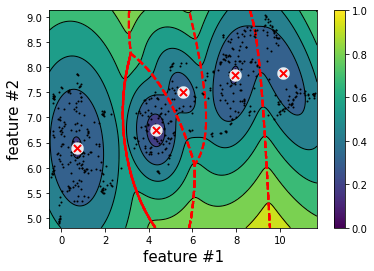

In [42]:
plot_gaussian_mixture(gm1,reducer1)
plt.colorbar()

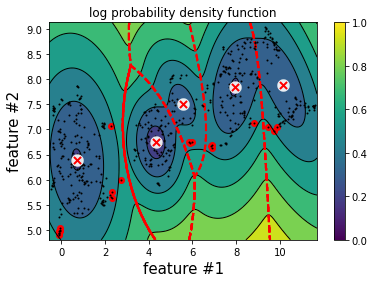

In [43]:
densities = gm1.score_samples(reducer1)
density_threshold = np.percentile(densities,4)
anomalies = reducer1[densities<density_threshold]

plt.title('log probability density function')
plot_gaussian_mixture(gm1, reducer1)
plt.colorbar()
plt.scatter(anomalies[:,0],anomalies[:,1],color='red')

put reducer into a dataframe and loc some of the anomalies, the index of these anamolies in the dataframe should be the same as the index in the origianl dataframe. plot the anomalies as well as pts from same clusters

In [44]:
reducer1df=pd.DataFrame(reducer1)

In [45]:
anomalies

array([[ 5.8545833 ,  6.7458444 ],
       [ 6.0031924 ,  6.742232  ],
       [ 5.8685374 ,  6.7339077 ],
       [ 2.7357633 ,  6.000781  ],
       [-0.09611353,  4.9400406 ],
       [ 6.913546  ,  6.6318707 ],
       [-0.12047724,  4.9021964 ],
       [-0.08564809,  4.973143  ],
       [ 6.884606  ,  6.693152  ],
       [ 9.74986   ,  6.969942  ],
       [-0.04870756,  5.0343175 ],
       [-0.11668505,  4.926788  ],
       [ 8.840286  ,  7.1261067 ],
       [ 2.2758362 ,  7.0715675 ],
       [ 6.8373632 ,  6.6690745 ],
       [-0.08145107,  4.972679  ],
       [ 2.330946  ,  5.745513  ],
       [ 9.444905  ,  7.0525994 ],
       [ 2.3215137 ,  5.629737  ],
       [-0.06898739,  4.99708   ],
       [ 9.853659  ,  7.0507603 ],
       [-0.10500173,  4.932633  ]], dtype=float32)

In [92]:
reducer1df.loc[((reducer1df[0] < 5.9) & (reducer1df[0] > 5.8))] 

,0,1
49,5.899303,7.225814
73,5.854583,6.745844
75,5.868537,6.733908


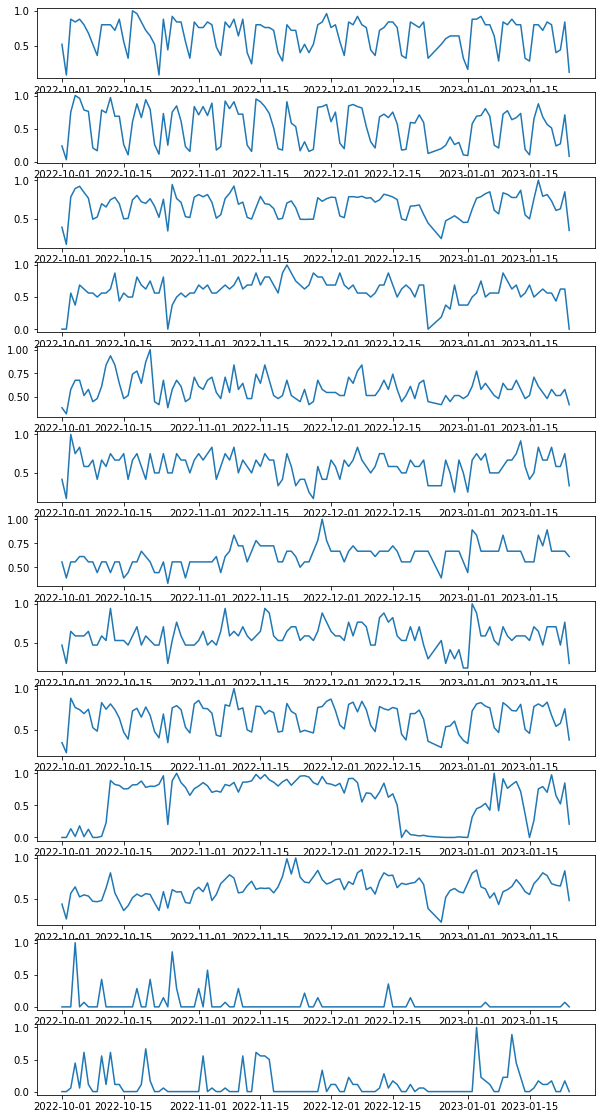

In [93]:
fig,ax = plt.subplots(13,1,figsize=(10,20))
ax[0].plot(counts.iloc[:,3])
ax[1].plot(counts.iloc[:,25])
ax[2].plot(counts.iloc[:,62])
ax[3].plot(counts.iloc[:,115])
ax[4].plot(counts.iloc[:,163])
ax[5].plot(counts.iloc[:,282])
ax[6].plot(counts.iloc[:,316])
ax[7].plot(counts.iloc[:,338])
ax[8].plot(counts.iloc[:,462])
ax[9].plot(counts.iloc[:,503])
ax[10].plot(counts.iloc[:,504])
ax[11].plot(counts.iloc[:,288])
ax[12].plot(counts.iloc[:,82])

### DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

In [98]:
# DBSCAN using reducer3 which appeared to be the best clustering

dbscan = DBSCAN(eps=0.4,min_samples=15)
#eps:the maxi distance two points can be from one another while still in the same cluster
#min_samples: min number of points that can form a cluster
dbscan.fit(reducer4)
# cluster labels (label = -1 means that the point is considered an anomaly)
labels = dbscan.labels_
# core points
cores = dbscan.components_

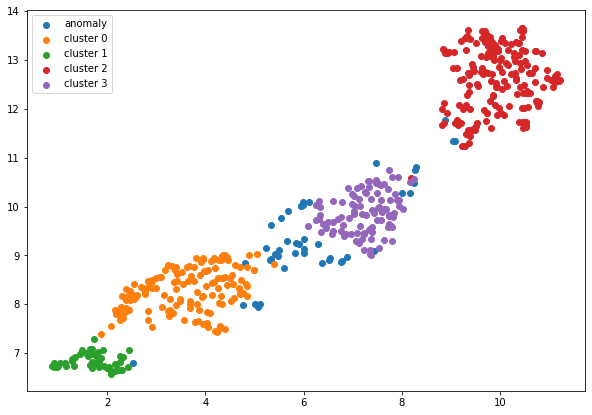

In [99]:
plt.figure(figsize=(10,7))
for i in np.unique(labels):
    if i!=-1:
        plt.scatter(reducer2[labels==i,0],reducer2[labels==i,1], label='cluster '+str(i))
    else:
        plt.scatter(reducer2[labels==i,0],reducer2[labels==i,1], label='anomaly')
plt.legend()

In [89]:
ind=dbscan.core_sample_indices_
ind

array([  2,   3,   4,   8,   9,  10,  11,  13,  21,  22,  23,  24,  26,
        27,  28,  29,  30,  31,  33,  34,  38,  39,  41,  42,  50,  53,
        55,  57,  58,  59,  60,  61,  70,  77,  78,  83,  87,  88,  91,
        94,  96, 100, 101, 104, 109, 110, 112, 114, 116, 120, 121, 122,
       123, 126, 127, 129, 131, 132, 133, 134, 135, 138, 139, 140, 141,
       142, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 158, 160,
       162, 165, 167, 168, 172, 173, 175, 177, 178, 180, 181, 183, 184,
       187, 189, 191, 192, 193, 194, 195, 198, 201, 202, 204, 205, 207,
       211, 212, 213, 216, 218, 219, 220, 221, 224, 225, 227, 228, 229,
       231, 235, 236, 237, 242, 244, 248, 254, 256, 258, 259, 261, 264,
       265, 266, 269, 270, 271, 274, 276, 279, 281, 283, 285, 289, 290,
       292, 293, 296, 298, 301, 302, 303, 310, 312, 314, 315, 317, 319,
       322, 324, 325, 327, 328, 330, 331, 333, 334, 335, 336, 344, 345,
       346, 348, 349, 350, 352, 354, 355, 357, 359, 362, 363, 36